# Coba_WeatherPy_Hw

In [88]:
# Dependencies and Setup
#!pip install citipy (installed)
#!pip install plotly (installed)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

# Import API key
import Coba_api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [90]:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Generate Cities List

In [74]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

630

## Perform API Calls

In [75]:
# OpenWeatherMap API Key
key = Coba_api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + key 

query_url = url + '&q='

cityweather = []
lat = []
temp = []
windspeed = []
cloudiness = []
humidity = [] 
id_city = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        id_city.append(response['id'])
        cityweather.append(city)
        print(f"The city being processed is: {city} | {response['id']}")
    except:
        pass      
     


The city being processed is: rikitea | 4030556
The city being processed is: minab | 123941
The city being processed is: manggar | 1636426
The city being processed is: butaritari | 2110227
The city being processed is: bethel | 5880568
The city being processed is: pangai | 4032369
The city being processed is: pedasi | 3703239
The city being processed is: assiniboia | 5887798
The city being processed is: marawi | 1701054
The city being processed is: kapaa | 5848280
The city being processed is: vaini | 1273574
The city being processed is: yulara | 6355222
The city being processed is: lebu | 344979
The city being processed is: spisske podhradie | 723519
The city being processed is: salalah | 286621
The city being processed is: bilibino | 2126682
The city being processed is: shiraz | 115019
The city being processed is: avarua | 4035715
The city being processed is: kavieng | 2094342
The city being processed is: luangwa | 909887
The city being processed is: upernavik | 3418910
The city being p

The city being processed is: pavilosta | 456827
The city being processed is: mizdah | 2214827
The city being processed is: geraldton | 5960603
The city being processed is: noyabrsk | 1496503
The city being processed is: grove city | 4513409
The city being processed is: tiksi | 2015306
The city being processed is: khovu-aksy | 1503527
The city being processed is: egvekinot | 4031742
The city being processed is: olinda | 3650121
The city being processed is: yumen | 1528998
The city being processed is: konya | 306571
The city being processed is: arraial do cabo | 3471451
The city being processed is: serdobsk | 496934
The city being processed is: nageshwari | 1185160
The city being processed is: qujing | 1797318
The city being processed is: antsohihy | 1068971
The city being processed is: gauribidanur | 1271459
The city being processed is: port elizabeth | 4501427
The city being processed is: coquimbo | 3893629
The city being processed is: west des moines | 4881346
The city being processed

The city being processed is: ust-omchug | 2120047
The city being processed is: bullhead city | 5287565
The city being processed is: acapulco | 3533462
The city being processed is: micheweni | 153955
The city being processed is: severo-kurilsk | 2121385
The city being processed is: puerto castilla | 3112703
The city being processed is: samarai | 2132606
The city being processed is: caruray | 1718234
The city being processed is: palmer | 5871146
The city being processed is: nelson bay | 2155562
The city being processed is: catia la mar | 3646190
The city being processed is: rocha | 3440777
The city being processed is: bubaque | 2374583
The city being processed is: lazaro cardenas | 3996234
The city being processed is: bambanglipuro | 1650434
The city being processed is: houston | 4699066
The city being processed is: midland | 5526337
The city being processed is: hede | 2720382
The city being processed is: nikolskoye | 546105
The city being processed is: storforshei | 3145614
The city bei

The city being processed is: tanete | 1629965
The city being processed is: quelimane | 1028434
The city being processed is: porangatu | 3453014
The city being processed is: maldonado | 3441894
The city being processed is: cayenne | 3382160
The city being processed is: turukhansk | 1488903
The city being processed is: llangefni | 2644037
The city being processed is: tieli | 2034440
The city being processed is: kampene | 214575
The city being processed is: muisne | 3653967
The city being processed is: paamiut | 3421193
The city being processed is: nizwa | 286987
The city being processed is: melfi | 3173615
The city being processed is: aktau | 610612
The city being processed is: praia da vitoria | 3372760
The city being processed is: watsa | 204283
The city being processed is: khash | 1160571
The city being processed is: sibolga | 1213855
The city being processed is: puerto ayacucho | 3629710
The city being processed is: ahuas | 3615022
The city being processed is: cortez | 5418104
The ci

In [76]:
weather_dict = {
    "city": cityweather,
    "lat": lat,
    "temp_max": temp,
    "windspeed": windspeed,
    "cloudiness": cloudiness,
    "humidity": humidity 
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp_max,windspeed,cloudiness,humidity
0,rikitea,-23.12,73.20,10.80,64,100
1,minab,27.15,93.20,4.70,0,52
2,manggar,-2.88,79.23,9.46,68,90
3,butaritari,3.07,82.11,5.21,92,100
4,bethel,60.79,53.60,16.11,90,93


In [157]:
# Print the city count to confirm sufficient count
weather_data.count()

city          562
lat           562
temp_max      562
windspeed     562
cloudiness    562
humidity      562
dtype: int64

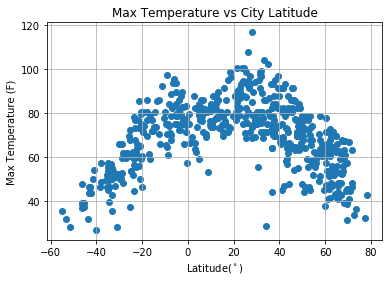

In [83]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature vs City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel(r"Latitude($^\circ$)")
plt.grid(True)

# Save the figure
plt.savefig("Temperature_Latitude_Plot.png")

# Show plot
plt.show()

In [120]:
#Now let's take a look at the graph in a more "interactive" way to understand the data. 
#We will do this by making use of plotly and all of it's features for scatter plots. 

trace = go.Scatter(
    x = weather_data["lat"],
    y = weather_data["temp_max"],
    mode = 'markers',
    marker= dict(size= 14,
                    line= dict(width=1),
                    opacity= 0.7,
                    color = weather_data["temp_max"],
                    colorscale='RdBu'
            ),
    hovertext=weather_data['city']
)

layout= go.Layout(
    title= 'Max Temperature vs City Latitude',
    xaxis= dict(
        title= "Latitude (deg)",
    ),
    yaxis=dict(
        title= 'Max Temperature (F)',
    ),
    showlegend= False,
    hovermode="closest"
)

data = [trace]

fig= go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig)

The plot above displaying the maximum temperature and city latitude shows that the temperature is significantly lower near the poles. Furthermore, there are outliers between 20$^\circ$ and 40$^\circ$ as well as a few below the graph's arc between -40$^\circ$ and 0$^\circ$. If we hover over some of the outliers we can see the name of the countries which have maximum temperatures outside of the normal curve distribution. Upon hovering over the data points, and after some research, the tallest point (largest temperature) happens to be a city located in a desert, called Adrar. The lowest point comes from the city Leh which is in the snowy Himalayan mountains. 

Another interesting observation is that there is a dip in temperatures above the curve, almost as if resembling the top half of a person's lips. Also, the temperature variations are not symmetric with respect to the equator (the vertical line with points to 0. This is a really cool feature which we can see because it indicates that currently the northern hemisphere of Earth is experiencing summer!    


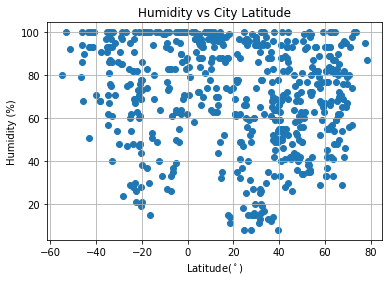

In [84]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel(r"Latitude($^\circ$)")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_Latitude_Plot.png")

# Show plot
plt.show()

In [123]:
trace = go.Scatter(
    x = weather_data["lat"],
    y = weather_data["humidity"],
    mode = 'markers',
    marker= dict(size= 14,
                    line= dict(width=1),
                    opacity= weather_data["humidity"]/100,
                    #color = weather_data["humidity"],
                    #colorscale='RdBu'
            ),
    hovertext=weather_data['city']
)

layout= go.Layout(
    title= 'Humidity vs City Latitude',
    xaxis= dict(
        title= "Latitude (deg)",
    ),
    yaxis=dict(
        title= 'Humidity (%)',
    ),
    showlegend= False,
    hovermode="closest"
)

data = [trace]

fig= go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig)

There are no regions on the equator with low humidity. The poles have regions with high humidity. There seem to be more cities above the northern hemisphere with higher humidity, perhaps again related to the fact that it's summer right now. 

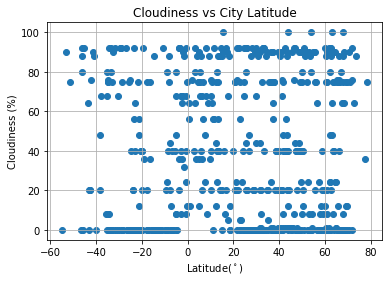

In [85]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel(r"Latitude($^\circ$)")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_Latitude_Plot.png")

# Show plot
plt.show()

In [147]:
trace = go.Scatter(
    x = weather_data["lat"],
    y = weather_data["cloudiness"],
    mode = 'markers',
    marker= dict(size= 14,
                    line= dict(width=1),
                    opacity= 1,
                    color = weather_data["cloudiness"],
                    colorscale='Blues'
            ),
    hovertext=weather_data['city']
)

layout= go.Layout(
    title= 'Cloudiness vs City Latitude',
    xaxis= dict(
        title= "Latitude (deg)",
    ),
    yaxis=dict(
        title= 'Cloudiness (%)',
    ),
    showlegend= False,
    hovermode="closest"
)

data = [trace]

fig= go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig)

The cloudiness of the cities seems to be measured more or less in increments of 20s, spaced somewhat evenly. 

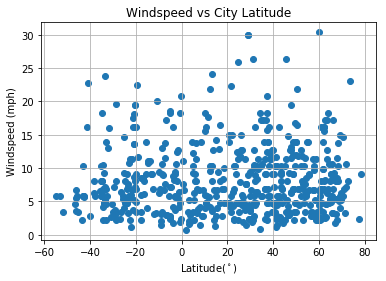

In [144]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed vs City Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlabel(r"Latitude($^\circ$)")
plt.grid(True)

# Save the figure
plt.savefig("Windspeed_Latitude_Plot.png")

# Show plot
plt.show()

In [155]:
trace = go.Scatter(
    x = weather_data["lat"],
    y = weather_data["windspeed"],
    mode = 'markers',
    marker= dict(size= 14,
                    line= dict(width=1),
                    opacity= 1,
                    color = -weather_data["windspeed"],
                    colorscale='Blackbody'
            ),
    hovertext=weather_data['city']
)

layout= go.Layout(
    title= 'Windspeed vs City Latitude',
    xaxis= dict(
        title= "Latitude (deg)",
    ),
    yaxis=dict(
        title= 'Windspeed (mph)',
    ),
    showlegend= False,
    hovermode="closest"
)

data = [trace]

fig= go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig)

Generally speaking, the wind is not very high aywhere on Earth, however, there are some cities with higher windspeed, especially three cities which are colored black, Tias, Teguise, and Nanortalik. 

In [156]:
weather_data.to_csv('Coba_WeatherPy_.csv')